# Predict Students Performance in Exams with MultiOutputRegressor

To understand the influence of the parents background, test preparation etc on students performance

### Step 1. Data Load & EDA

In [323]:
import pandas as pd

In [324]:
df = pd.read_csv('./data/StudentsPerformance.csv')

In [325]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [327]:
for col in df.iloc[:,:-3].columns:
    print('column : {}'.format(col))
    print('Unique values : {}'.format(df[col].unique()))
    print('------------------------------')

column : gender
Unique values : ['female' 'male']
------------------------------
column : race/ethnicity
Unique values : ['group B' 'group C' 'group A' 'group D' 'group E']
------------------------------
column : parental level of education
Unique values : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
------------------------------
column : lunch
Unique values : ['standard' 'free/reduced']
------------------------------
column : test preparation course
Unique values : ['none' 'completed']
------------------------------


### Step 2. Visualization

In [328]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [329]:
plt.style.use('dark_background')

In [330]:
import warnings
warnings.filterwarnings(action='ignore') 

- **Each X's distribution**

In [331]:
def show_values(col):
    index = df[col].value_counts().index
    values = df[col].value_counts().values
    
    plt.figure(figsize=(10,4))
    plt.title(col)
    sns.barplot(x=index, y=values)
    plt.show()

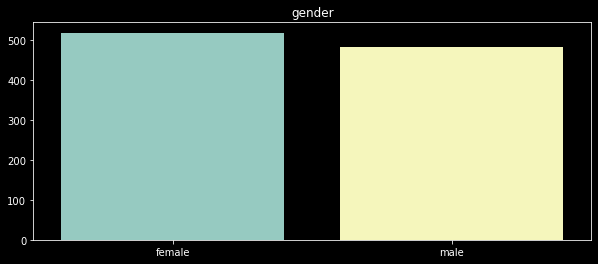

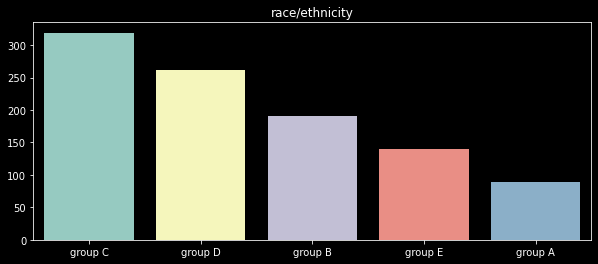

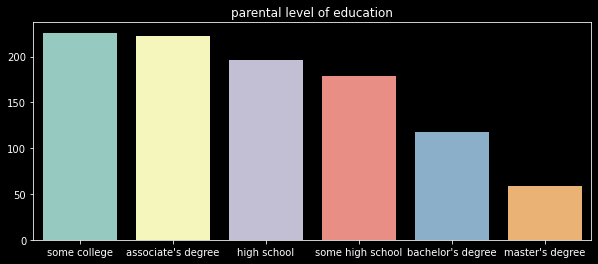

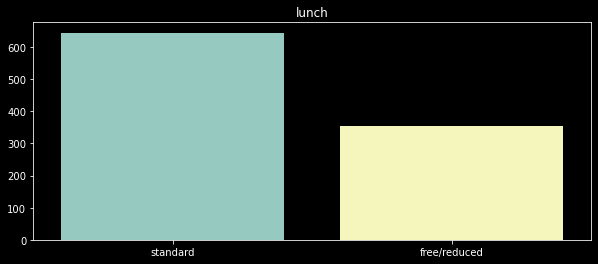

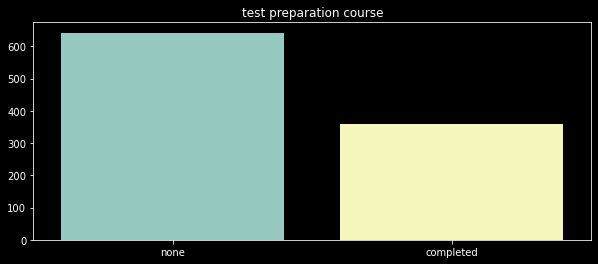

In [332]:
for col in df.iloc[:,:-3].columns:
    show_values(col)

- **Each Y's distribution**

In [333]:
def show_dist(col):
    plt.figure(figsize=(10,4))
    plt.title(col)
    sns.distplot(df[col])
    plt.show()

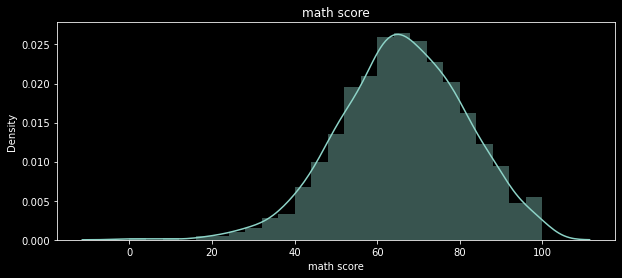

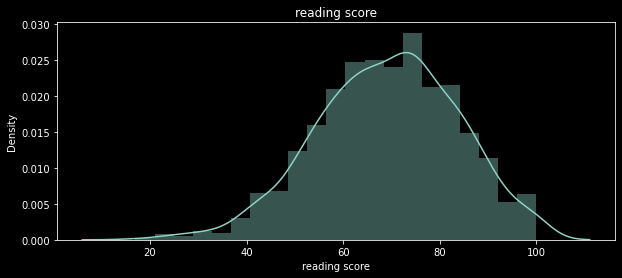

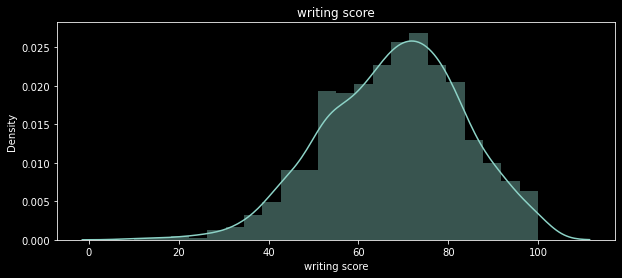

In [334]:
for col in df.iloc[:,-3:]:
    show_dist(col)

- **'X & Y's distribution**

In [335]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [336]:
def show_score(col):
    for score in df.iloc[:,-3:].columns:
        sns.barplot(x=col, y=score, data=df)
        plt.title('{} & {}'.format(col, score))
        plt.xticks(rotation=90)
        plt.show()

In [337]:
df.groupby('gender').mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


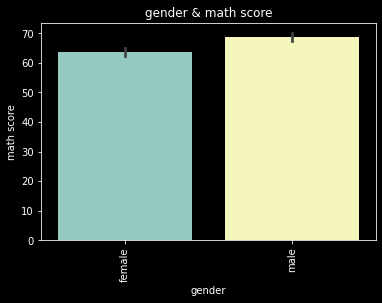

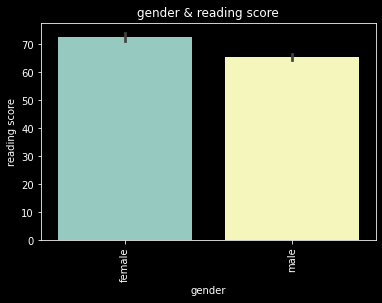

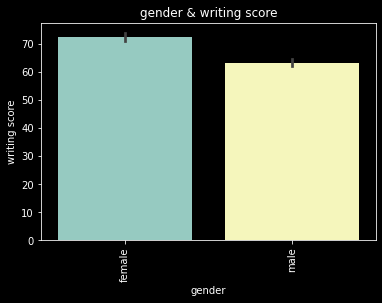

In [338]:
show_score('gender')

In [339]:
df.groupby('race/ethnicity').mean()

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


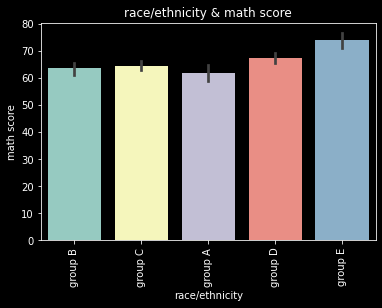

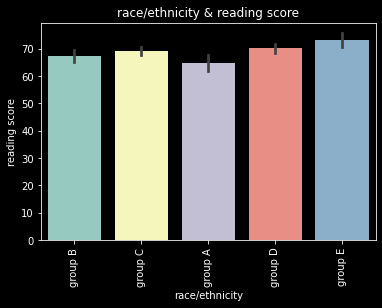

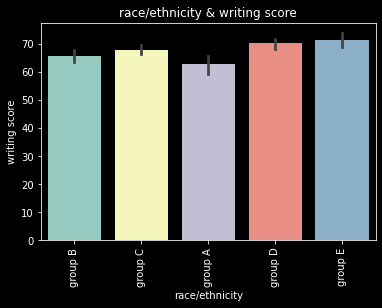

In [340]:
show_score('race/ethnicity')

In [341]:
df.groupby('parental level of education').mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


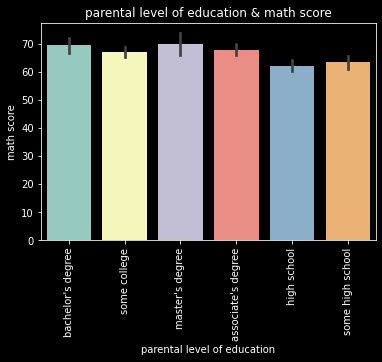

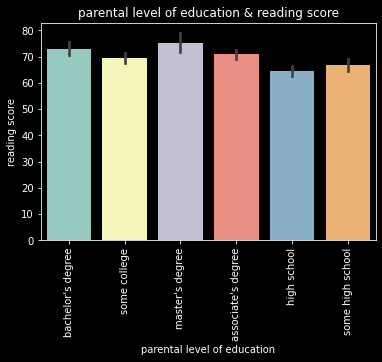

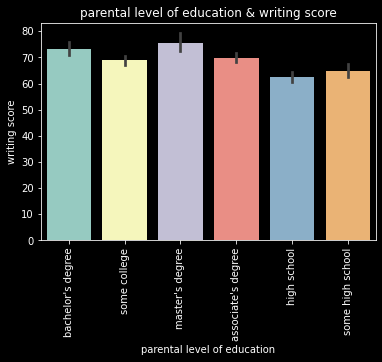

In [342]:
show_score('parental level of education')

In [343]:
df.groupby('lunch').mean()

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


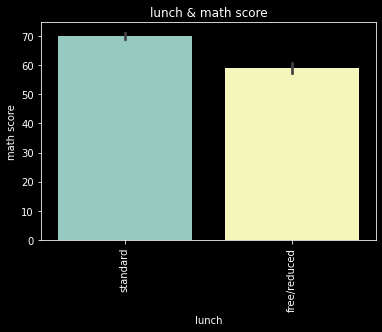

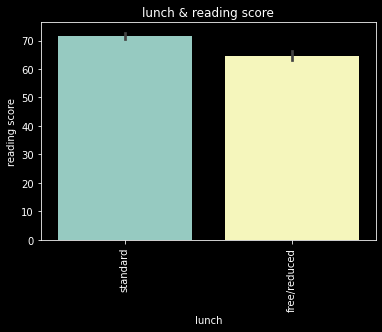

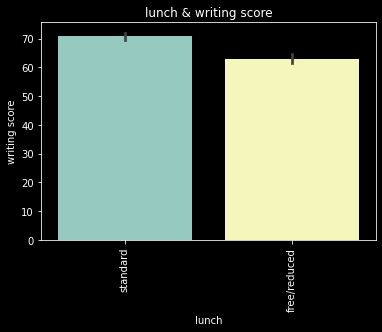

In [344]:
show_score('lunch')

In [345]:
df.groupby('test preparation course').mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


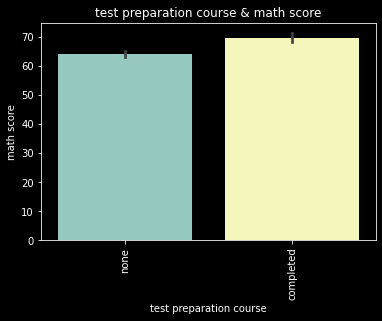

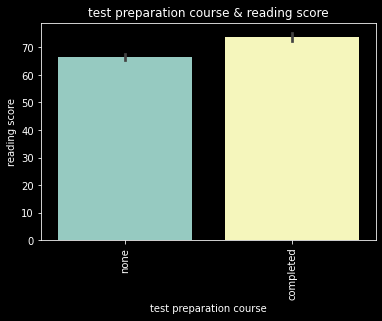

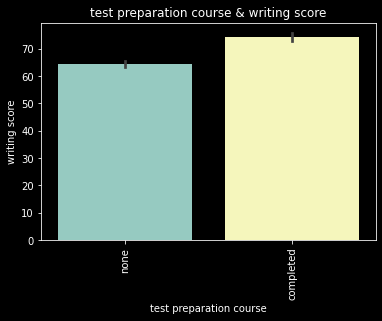

In [346]:
show_score('test preparation course')

### Step 3. Data Preprocessing

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [348]:
X = df.iloc[:,:-3]
y = df.iloc[:,-3:]

In [349]:
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [350]:
y

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [351]:
X_encoded = pd.get_dummies(X)
X_encoded

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
996,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
997,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
998,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0


In [352]:
new_df = pd.concat([X_encoded,y], axis=1)
new_df

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none,math score,reading score,writing score
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,72,72,74
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,69,90,88
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,90,95,93
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,47,57,44
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,88,99,95
996,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,62,55,55
997,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,59,71,65
998,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,68,78,77


In [353]:
new_X = new_df.iloc[:,:-3]
new_y = new_df.iloc[:,-3:]

In [354]:
print(new_X.shape, new_y.shape)

(1000, 17) (1000, 3)


In [355]:
from sklearn.model_selection import train_test_split

In [356]:
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.25, random_state=111)

In [357]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(750, 17) (750, 3) (250, 17) (250, 3)


### Step 4. Modeling

In [358]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score

In [359]:
rfr = RandomForestRegressor(n_estimators=100, random_state=0)
mr = MultiOutputRegressor(estimator=rfr)
mr.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=0))

In [360]:
y_pred = mr.predict(X_train)

In [361]:
r2_score(y_train, y_pred)

0.44916991793656563

In [362]:
mr.score(X_test, y_test)

-0.017892566650505464